In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
vocabulary = []
with open('vocab.nips.txt','r') as vocfile:    
    for voc in vocfile:
        voc = voc.replace('\n','')
        vocabulary.append(voc)
vocabulary

['a2i',
 'aaa',
 'aaai',
 'aapo',
 'aat',
 'aazhang',
 'abandonment',
 'abbott',
 'abbreviated',
 'abcde',
 'abe',
 'abeles',
 'abi',
 'abilistic',
 'abilities',
 'ability',
 'abl',
 'able',
 'ables',
 'ablex',
 'ably',
 'abnormal',
 'abort',
 'abound',
 'abramowicz',
 'abrash',
 'abrupt',
 'abruptly',
 'abscissa',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstr',
 'abstract',
 'abstracted',
 'abstraction',
 'abu',
 'abundances',
 'aca',
 'acad',
 'academic',
 'academy',
 'acc',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 'accent',
 'accept',
 'acceptable',
 'acceptably',
 'acceptance',
 'accepted',
 'accepting',
 'acceptor',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accommodate',
 'accommodated',
 'accomodate',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accord',
 'accordance',
 'according',
 'account',
 'accounted',
 'accounting',


In [68]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=10
#?np.zeros

x_mat = np.zeros((1500,12419))
with open('docword.nips.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:
        content = doc.split(' ')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(1500, 12419)

In [71]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=10
#?np.zeros

x_mat = np.zeros((20001,31494))
with open('feat-obs.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:        
        content = doc.split(',')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(20001, 33925)

In [6]:
x_mat

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [152]:
totalClust=15
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint


(15, 31494)


0.99999999999999944

In [153]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
while(trace_Q > treshold):
    sum_Qpart = 0
    print('ESTEP')
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    print('MSTEP')
    for jTrace in range(j):
        print(jTrace)
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)


ESTEP


KeyboardInterrupt: 

In [38]:
p_jk[1,].sum()

1.0

In [39]:
npvoc = np.array(vocabulary)

In [51]:
npvoc[np.argsort(-p_jk)]

array([['network', 'model', 'data', ..., 'flicker', 'fogel', 'zwislocki'],
       ['network', 'model', 'learning', ..., 'loess', 'lives', 'zwislocki'],
       ['network', 'neuron', 'function', ..., 'latent', 'lea', 'zwislocki'],
       ..., 
       ['learning', 'function', 'algorithm', ..., 'innate', 'injected',
        'zwislocki'],
       ['learning', 'rules', 'examples', ..., 'helsinki', 'hemisphere',
        'zwislocki'],
       ['cell', 'direction', 'model', ..., 'illus', 'ild', 'zwislocki']], 
      dtype='<U23')

<Container object of 30 artists>

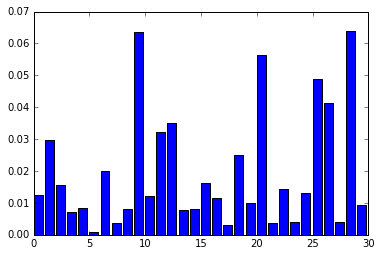

In [64]:
plt.bar(range(totalClust),pi_j)

In [69]:
# this is slow, better using first algorithm
import math, random, copy
import numpy as np
import sys
from scipy import misc
from scipy.spatial import distance
from scipy.cluster.vq import vq, kmeans, whiten
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt


def expectation_maximization(x, nbclusters, nbiter=30, epsilon=0.0001):

    def closest_cluster(words_for_doc, mus, nbclusters):
        distances = np.zeros((nbclusters,))
        for j in range(nbclusters):
            distances[j] = distance.euclidean(words_for_doc, mus[j])
        return np.argmin(distances)

    def calculate_q(x, nbclusters, mus, pies, w):
        sigma = 0
        for j in range(nbclusters):
            inner_prod = x*np.log(mus[j])
            sum = inner_prod + math.log(pies[j])
            sigma += sum*w[:,j,np.newaxis]
        return np.sum(sigma)


    #E step, compute w_i,j
    #vector of pies - pies - [j]
    #vector of mus - mus - [j,k]
    #x - [i,k]
    #w should be [i,j]
    #logA - [i,j]
    #logA_max - [i,1]
    #logY - log(w_ij)
    def e_step(x, nbclusters, mus, pies):
        logA = np.zeros((x.shape[0], nbclusters))
        for j in range(nbclusters):
            sigma = x*np.log(mus[j])
            logA[:,j] = np.log(pies[j]) + np.sum(sigma, axis=1)
        logA_max = np.zeros((x.shape[0],))
        logA.max(axis=1, out=logA_max)
        sum=0
        for j in range(nbclusters):
            sum += np.exp(logA[:,j] - logA_max)
        term3 = np.log(sum)
        logY = np.zeros((x.shape[0], nbclusters))
        for j in range(nbclusters):
            logY[:,j] = logA[:,j] - logA_max - term3
        y = np.exp(logY)
        w = y
        return w


    def m_step(x, w, nbclusters):
        new_mus = np.zeros((nbclusters, x.shape[1]))
        new_pies = np.zeros((nbclusters))
        for j in range(nbclusters):
            den = np.sum(np.sum(x, axis=1)*w[:,j])
            num = np.sum(x*w[:,j,np.newaxis], axis=0)
            new_mus[j] = num/den
            new_pies[j] = np.sum(w[:,j])/1500
        new_new_mus = np.zeros((nbclusters, x.shape[1]))
        for j in range(nbclusters):
            new_new_mus[j] = (new_mus[j]+.0001)/(np.sum(new_mus[j])+new_mus.shape[1]/10000)
        return new_new_mus, new_pies


    #USE K-MEANS TO GET INITIAL CENTERS
    centroids, distortion = kmeans(x,k_or_guess=nbclusters, iter=5)
    #normalizes ps ie mus
    mus = np.zeros((nbclusters, centroids.shape[1]))
    for j in range(nbclusters):
        mus[j] = (centroids[j]+.0001)/(np.sum(centroids[j])+centroids.shape[1]/10000)

    pies = np.full((nbclusters), 1.0/nbclusters)
    iter = 0
    difference = 10000
    old_q = 0
    q = 0
    while iter < 30 and difference > epsilon:
        iter += 1
        print("running iteration " + str(iter))
        w = e_step(x, nbclusters, mus, pies)
        mus, pies = m_step(x, w, nbclusters)
        old_q = q
        q = calculate_q(x, nbclusters, mus, pies, w)
        difference = abs(q-old_q)/abs(q)
        print("Difference in quality is " + str(difference))

    result = {}
    result['clusters'] = {}
    result['params'] = {}
    for i in range(nbclusters):
        result['params'][i] = {}
        result['params'][i]['pi'] = pies[i]
        result['params'][i]['mu'] = mus[i]
    for index, words_for_doc in enumerate(x):
        cluster = closest_cluster(words_for_doc, mus, nbclusters)
        if cluster not in result['clusters']:
            result['clusters'][cluster]=[]
        result['clusters'][cluster].append(index)

    #find top 10 words for each cluster
    """
    print ""
    print "top 10 words for each cluster"
    data = [line.strip() for line in open("vocab.nips.txt", 'r')]
    for i in xrange(nbclusters):
        top10 = result['params'][i]['mu'].argsort()[-10:][::-1]
        top10_words = [data[index] for index in top10]
        print top10_words
    """
    return result


In [72]:
test = expectation_maximization(x_mat,30)

running iteration 1


KeyboardInterrupt: 

In [154]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=15
#?np.zeros

x_mat = np.zeros((20001,31494))
with open('feat-obs.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:        
        content = doc.split(',')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(20001, 31494)

In [155]:
# calculate cluster center using kmeans for initialization
centroids, distortion = kmeans(x_mat,k_or_guess=totalClust, iter=5)
#normalizes ps ie mus
mus = np.zeros((totalClust, centroids.shape[1]))
for j in range(totalClust):
    mus[j] = (centroids[j]+.0001)/(np.sum(centroids[j])+centroids.shape[1]/10000)

In [156]:
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
"""
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]
"""
# initialize using kmeans
p_jk = mus

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint

(15, 31494)


1.0

In [157]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
count = 0
max_iter = 20
while(trace_Q > treshold and count<max_iter):
    count+=1
    sum_Qpart = 0
    print('ESTEP')
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    print('MSTEP')
    for jTrace in range(j):
        #print(jTrace)
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    #print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)

ESTEP
MSTEP
1.0
ESTEP
MSTEP
0.331896710601
ESTEP
MSTEP
0.0138953272681
ESTEP
MSTEP
0.000900901172858
ESTEP
MSTEP
0.000337840116263
ESTEP
MSTEP
8.98778915622e-05


<Container object of 15 artists>

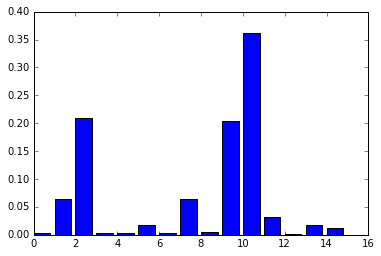

In [158]:
plt.bar(range(totalClust),pi_j/sum(pi_j))

In [159]:
vocabulary = []
with open('words-obs.txt','r') as vocfile:    
    for voc in vocfile:
        voc = voc.replace('\n','')
        vocabulary.append(voc)
npvoc = np.array(vocabulary)

In [864]:
npvoc[np.argsort(-p_jk)].shape
npvoc[np.argsort(-p_jk)][:,0:20]

#-np.sort(-p_jk)

array([['mars', 'jihad', 'lose', 'bureaucratic', 'para', 'world',
        'gtupdate', 'voice', 'newspaper', 'grace', 'atrocities', 'stir',
        'source', 'mean', 'prosecuted', 'spectre', 'symptom', 'olympic',
        'came', 'wishful'],
       ['know', '55', 'efficient', 'divisi', 'looking', 'karni', 'scourge',
        'su', 'declaro', 'new', 'campaigning', 'libertad', 'retorne',
        'imperio', 'especie', 'guarda', 'grasp', 'bored', 'certain',
        'ladrones'],
       ['commitment', 'applaud', 'king', 'fulfill', 'peace', 'laptop',
        'infared', 'using', 'tv', 'team', 'house', 'satisfying', 'rica',
        'aimed', 'little', 'barack', 'tarnishes', 'gone', 'idea', 'para'],
       ['bein', 'fails', 'political', 'diaz', 'kala', 'families', 'peace',
        'barack', 'house', 'grace', 'aimed', 'check', 'xc', 'publications',
        'ngo', 'ethics', 'rezko', 'rica', 'mercy', 'nice'],
       ['january', 'jiving', 'signs', 'silencing', 'water', 'peace',
        'mars', 'applaud'

In [149]:
import pickle

In [187]:
em_results = {}
em_results['pi_j'] = pi_j
em_results['p_init'] = mus
em_results['p_jk'] = p_jk
em_results['w_ij'] = w_ij
em_results['cluster'] = totalClust
pickle.dump( em_results, open( "em_results_15b.p", "wb" ) )


In [98]:
np.sort(-p_jk)

array([[ -9.74136558e-03,  -9.58132917e-03,  -8.46137176e-03, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -3.45228588e-02,  -3.27734599e-02,  -2.33285546e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -4.80845895e-02,  -3.49780309e-02,  -3.48804644e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       ..., 
       [ -5.05844318e-02,  -3.90146112e-02,  -3.14807745e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -2.40751585e-02,  -1.63028954e-02,  -1.02367388e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -6.37309710e-02,  -4.01065963e-02,  -3.35137475e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08]])

In [99]:
import pandas as pd

In [104]:
ex_feature = pd.read_csv('ex-feature.txt',header=None,names=['doc','word','total'])

In [112]:
np.mean(ex_feature.groupby('doc')['total'].sum())

10.79320567456993

In [126]:
sum_dist = ex_feature.groupby('doc')['total'].sum()

In [127]:
sum_dist[sum_dist<100].std()

13.28447405993878

In [139]:
sum_dist[sum_dist<100].count()

4300938

(array([  3.68950100e+06,   4.28476000e+05,   1.22328000e+05,
          4.36620000e+04,   1.69710000e+04,   8.36100000e+03,
          4.31000000e+03,   2.18600000e+03,   1.21000000e+03,
          8.27000000e+02]),
 array([   1. ,   20.8,   40.6,   60.4,   80.2,  100. ,  119.8,  139.6,
         159.4,  179.2,  199. ]),
 <a list of 10 Patch objects>)

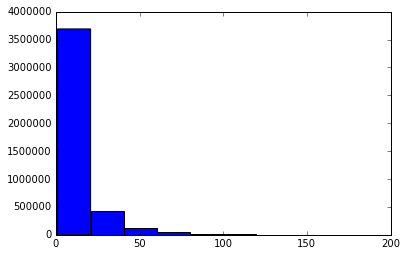

In [132]:
plt.hist(sum_dist[sum_dist<200].values)

In [188]:
npvoc.arg

In [190]:
p_jk.shape

(15, 31494)

In [219]:
p_jk[:,[101,10,100,12]].sum(axis=1)
test = p_jk[:,[1,10,1,12]].sum(axis=1)
max(test / test.sum())

0.19600750604320424

In [224]:
aha = [[123],[345],[565]]

array([[123, 345, 565]])

In [865]:
# count the accuracy of our baseline
with open('prediction-child-parents.20170330.txt','r') as preds:
    tp = 0
    tn = 0
    count = 0
    for row in preds:
        myPred = json.loads(row)
        tnode = myPred['target_node']
        for idx in myPred['alpha'].keys():
            alpha = myPred['alpha'][idx]
            if idx != tnode:
                if alpha <= 1e-8:
                    tn+=1
                else:
                    tp+=1
                count+=1
                

In [866]:
error_rate = tn / count
accuracy = tp / count
print('Error Rate (False Negative): {}'.format(error_rate))
print('Accuracy (True Positive): {}'.format(accuracy))

Error Rate (False Negative): 0.2865320620032071
Accuracy (True Positive): 0.713467937996793


In [867]:
# count the accuracy for improved model
import time
with open('prediction-child-parents-p.txt','r') as preds:
    newtp = 0
    newtn = 0
    newcount = 0
    for row in preds:
        myPred = json.loads(row)
        tnode = myPred['target_node']
        for idx in myPred['alpha'].keys():            
            alpha = myPred['alpha'][idx]
            p_value = [ x for x in alpha if x > 1e-8]
            #print(p_value)
            #time.sleep(3)
            if idx != tnode:
                if len(alpha)==0 or len(p_value) == 0:
                    newtn+=1
                else:
                    newtp+=1
                newcount+=1

In [868]:
error_rate = newtn / newcount
accuracy = newtp / newcount
print('Error Rate (False Negative): {}'.format(error_rate))
print('Accuracy (True Positive): {}'.format(accuracy))

Error Rate (False Negative): 0.16435332862044588
Accuracy (True Positive): 0.8356466713795541


In [285]:
# TODO
# Provide interactive analysis for choosen observation nodes

In [648]:
# Load all data, nodes, edges, and cascades
# Nodes
nodes = []
nodeHash = {}
with open('nodes.txt','r') as nodesFile:
    for node in nodesFile:
        rownode = node.replace('\n','').split(',')
        nodes.append(rownode[1])
        #nodeHash[rownode[0]] = int(rownode[1])
        nodeHash[int(rownode[1])] = rownode[0]

In [288]:
# Edges
edges = {}
followes = {}
with open('edges.txt','r') as edgesFile:
    for edge in edgesFile:
        edgeJson = edge.replace('\n','').split(',')
        if int(edgeJson[0]) not in edges.keys():
            edges[int(edgeJson[0])] = []
        if int(edgeJson[1]) not in followes.keys():
            followes[int(edgeJson[1])] = []
        edges[int(edgeJson[0])].append(int(edgeJson[1]))
        followes[int(edgeJson[1])].append(int(edgeJson[0]))

In [561]:
# Cascades
cascades = {}
cascade_count = 0
nodeCascades = {}
cascade_checker = {}
cascade_probs = {}
with open('cascade-file-parent-probs.txt','r') as casFile:
    for casRead in casFile:
        # prepare cascade
        # load cascade from the file
        obsNode = json.loads(casRead)
        #print(obsNode)
        parent_node = obsNode['node']
        for obsCascades in obsNode['cascades']:
            if obsCascades['url'] not in cascade_checker:
                cascade_checker[obsCascades['url']] = 1
            else:
                continue
            cascade_id = cascade_count
            cascades[cascade_id] = {'probs': obsCascades['probs'],'cas': []}
            for obsCas in obsCascades['cas']:
                dst = int(obsCas['node'])
                at = float(obsCas['time'])/2505600
                cascades[cascade_id]['cas'].append((at, dst))                

                # append cascadeid to nodes
                if dst not in nodeCascades.keys():
                    nodeCascades[dst] = []
                nodeCascades[dst].append(cascade_id)
            # add new cascade id
            cascade_count+=1

In [291]:
# Define logSurvival and Hazard function
def logSurvival(t_i, t_j, alpha_ji):
    # survival function for the transmission
    #print('log alpha: {}'.format(alpha_ji))
    return -alpha_ji * (t_i - t_j)

def hazard(t_i, t_j, alpha_ji):
    # hazard function when one node succesfully infected
    #print('haz alpha: {}'.format(alpha_ji))
    #return alpha_ji
    return alpha_ji

In [292]:
nodeCasSort = sorted(list(nodeCascades.keys()))

In [563]:
import cvxpy as CVX
from collections import defaultdict
import time
import random

time_period = 1.0

def solveTargetNode(target_node,k_neighbor = 5):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    for parent in edges[target_node]:
        if parent in nodeCascades:
            [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        # add 5 random neighbor from the parents
        nFollowers = len(followes[parent])
        k = k_neighbor
        k = k if nFollowers > k else nFollowers
        neighbors = random.sample(range(nFollowers),k)
        #print(followes[parent])
        #print(neighbors)        
        for neighbor in neighbors:
            myneighbor = followes[parent][neighbor]
            #print(myneighbor)
            if myneighbor not in convexNodes:
                convexNodes[myneighbor] = convexNodesCount
                convexNodesArr.append(myneighbor)
                neighborArr.append(myneighbor)
                convexNodesCount+=1

    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
            """
            parent = -1
            for val in cascades[casid]:
                # get parent
                if parent == -1:
                    parent = val[1]
                myneighbor = val[1]
                if myneighbor not in convexNodesArr:
                    convexNodes[val[1]] = convexNodesCount
                    convexNodesArr.append(myneighbor)
                    derivedFrom[myneighbor] = parent
                    convexNodesCount+=1
            """
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, num_nodes), dtype=float)

    # This is one column of the alpha matrix
    Ai = CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node]))

    constraints=[]
    # define constraints
    for j in range(num_nodes):
        if j == convexNodes[target_node]:
            constraints.append(Ai[j] == 0)
        else:
            constraints.append(Ai[j] >= 0)
            #constraints.append(Ai[j] >> 0)

    for num_node in range(num_nodes):
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        for c_idx, citem in observationCascades.items():
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
            c = citem['cas']        
            #c_idx = nodecas
            #c = cascades[c_idx]
            #print(myCount)
            #print(c)
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        alpha_ji = Ai[convexNodes[c[j][1]]]
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        expr += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    log_sum = 0

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            alpha_ji = Ai[convexNodes[c[j][1]]]
                            #print('alpha_ji haz: {}'.format(alpha_ji))

                            if t_j < t_i:
                                expr+=logSurvival(t_i,t_j,alpha_ji)
                                #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                log_sum+=hazard(t_i,t_j,alpha_ji)
                                proceed=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    expr += CVX.log(log_sum)                
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        try:
            if proceed:
                prob = CVX.Problem(CVX.Maximize(expr), constraints)
                #res = prob.solve(verbose=True,max_iters=500)
                res = prob.solve(verbose=False,max_iters=500)
                #if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                tempA = np.asarray(Ai.value).squeeze().tolist()
                #print(convexNodes[target_node_loc])
                A[:,num_node] = tempA
                #print(len(tempA))
                #Aone = {}                
                #for x in range(len(tempA)):            
                #    Aone[convexNodesArr[x]] = tempA[x]
                #print(A)
                #else:
                #    A[:, target_node] = -1
                #print('result: {}'.format(res))
            else:
                A[:,num_node] = 0
        except BaseException as e:
            print(e)
            tempA[:] = -1
            A[:,num_node] = tempA
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [564]:
tnode = solveTargetNode(774,2)

1 of 89
2 of 89
3 of 89
4 of 89
5 of 89
Combined backtracking failed 90 0 0 0 sigma 0.00862514
Solver 'ECOS' failed. Try another solver.
6 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0173491
Solver 'ECOS' failed. Try another solver.
7 of 89
8 of 89
9 of 89
10 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0250953
Solver 'ECOS' failed. Try another solver.
11 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0107384
Solver 'ECOS' failed. Try another solver.
12 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0141066
Solver 'ECOS' failed. Try another solver.
13 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0137143
Solver 'ECOS' failed. Try another solver.
14 of 89
15 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0208622
Solver 'ECOS' failed. Try another solver.
16 of 89
17 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0637075
Solver 'ECOS' failed. Try another solver.
18 of 89
19 of 89
20 of 89
21 of 89
Combined backtracking failed 90 0 0 0 sigma 0.07947

In [565]:
tnode['mat'].shape

(89, 89)

In [522]:
tnode

{'mat': array([[  0.00000000e+00,   3.04485768e-15,   3.04485768e-15, ...,
           3.13054138e-15,   3.10468550e-15,   6.34558406e-09],
        [  6.06100829e+00,   9.56288865e-01,   9.56288865e-01, ...,
           9.57135969e-01,   9.56960263e-01,   3.29299851e+05],
        [  6.06100829e+00,   9.56288865e-01,   9.56288865e-01, ...,
           9.57135969e-01,   9.56960263e-01,   3.29299851e+05],
        ..., 
        [  4.48051321e-08,   1.21602221e-10,   1.21602221e-10, ...,
           9.57135969e-01,   1.21343113e-10,   1.44916677e-02],
        [  4.39050623e-09,   1.41342793e-11,   1.41342793e-11, ...,
           1.42162250e-11,   9.56960263e-01,   1.87570706e-03],
        [ -1.03418968e-09,  -7.65346525e-13,  -7.65346525e-13, ...,
          -7.37994260e-13,  -7.38275042e-13,   3.29299851e+05]]),
 'neighbors': [32591,
  4348,
  33626,
  43451,
  32034,
  23470,
  23795,
  12498,
  4727,
  39309,
  1241,
  36055,
  36231,
  15709,
  42845,
  34058,
  32228,
  4782,
  29361,
  220

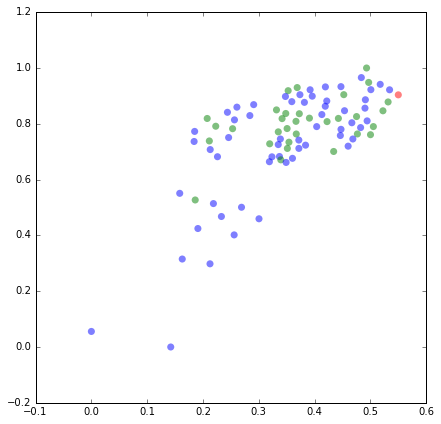

In [523]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

dist_mat = tnode['mat']
dist_mat = np.log(1/np.where(dist_mat<1e-6, 1e-6, dist_mat))
#dist_mat = 1/np.where(dist_mat<1e-6, 1e-6, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)

#pos = pCoordinate(dist_mat)
#print(pos)

G = nx.from_numpy_matrix(dist_mat) 
pos=nx.spring_layout(G,dim=2,k=0.3)
#print(pos)

trans = tnode['trans']
colors = np.tile('',len(trans))
for i in range(len(trans)):
    tran = trans[i]
    if tran == tnode['target']:
        colors[i]='red'
    if tran in tnode['parents']:
        colors[i]='green'
    if tran in tnode['neighbors']:
        colors[i]='blue'

fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, projection='3d')
for k, p in pos.items():
    plt.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()


84.9852538013


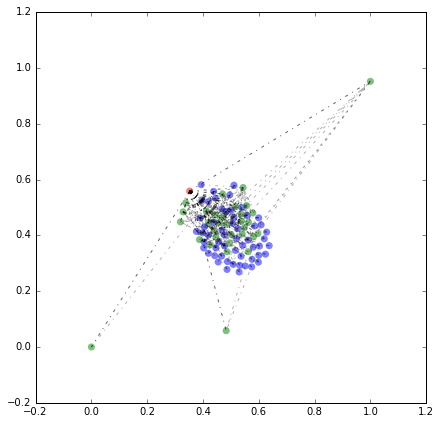

In [566]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3

dist_mat = tnode['mat']
max_val = np.max(dist_mat)
print(max_val) 
dist_mat = np.log(max_val/np.where(dist_mat<1e-6, 1e-6, dist_mat))
#dist_mat = 1/np.where(dist_mat<1e-6, 1e-6, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)

#pos = pCoordinate(dist_mat)
#print(pos)

G = nx.from_numpy_matrix(dist_mat) 
pos=nx.spring_layout(G,dim=2,k=0.4)
#print(pos)

trans = tnode['trans']
colors = np.tile('',len(trans))
parents = []
neighbors = []
target = 0
for i in range(len(trans)):
    tran = trans[i]
    if tran == tnode['target']:
        colors[i]='red'
        target = i
    if tran in tnode['parents']:
        colors[i]='green'
        parents.append(i)
    if tran in tnode['neighbors']:
        colors[i]='blue'
        neighbors.append(i)

        
        
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, projection='3d')

# draw the lines from parents to target
for parent in parents:
    ax.plot([pos[target][0],pos[parent][0]],[pos[target][1],pos[parent][1]],'-.',c='black',alpha=0.6)

# draw the lines from the neighbors to all parent
for neighbor in neighbors:
    act_neighbor = trans[neighbor]
    # get all the parent
    myParents = edges[act_neighbor]
    for myParent in myParents:
        if myParent in trans:
            pIndex = trans.index(myParent)
            ax.plot([pos[neighbor][0],pos[pIndex][0]],[pos[neighbor][1],pos[pIndex][1]],'-.',c='black',alpha=0.3)

    
for k, p in pos.items():
    scatter = ax.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()
tooltip = plugins.PointHTMLTooltip(scatter, ['aha','oho'],
                                   voffset=10, hoffset=10)
plugins.connect(fig, tooltip)
#mpld3.display()
mpld3.enable_notebook()


In [822]:
import cvxpy as CVX
from collections import defaultdict
import time
import random

time_period = 1.0

def solveTargetNodeWithProb(target_node,k_neighbor = 5):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    for parent in edges[target_node]:
        if parent in nodeCascades:
            [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        # add 5 random neighbor from the parents
        nFollowers = len(followes[parent])
        k = k_neighbor
        k = k if nFollowers > k else nFollowers
        neighbors = random.sample(range(nFollowers),k)
        #print(followes[parent])
        #print(neighbors)        
        for neighbor in neighbors:
            myneighbor = followes[parent][neighbor]
            #print(myneighbor)
            if myneighbor not in convexNodes:
                convexNodes[myneighbor] = convexNodesCount
                convexNodesArr.append(myneighbor)
                neighborArr.append(myneighbor)
                convexNodesCount+=1

    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, num_nodes, 15), dtype=float)

    for num_node in range(num_nodes):
        # This is one column of the alpha matrix
        Ai = [CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) for i in range(15)]
        constraints=[]
        # define constraints
        for j in range(num_nodes):
            if j == num_node:
                for i in range(15):
                    constraints.append(Ai[i][j] == 0)
            else:
                for i in range(15):
                    constraints.append(Ai[i][j] >= 0)
                #constraints.append(Ai[j] >> 0)
            
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        
        # prepare expression array
        exprArr = [0 for i in range(15)]
        
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
        for c_idx, citem in observationCascades.items():
            # normalize probability
            cprob = np.array(citem['probs'])
            cprob = cprob/cprob.sum()
            c = citem['cas']
        
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        for i in range(len(cprob)):                        
                            alpha_ji = Ai[i][convexNodes[c[j][1]]]    
                            exprArr[i] += logSurvival(T, t_j, alpha_ji * cprob[i])
                            #exprArr[i] += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    #log_sum = 0
                    log_sum = [0 for x in range(15)]

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            #print('alpha_ji haz: {}'.format(alpha_ji))

                            if t_j < t_i:
                                for i in range(len(cprob)):                                
                                    alpha_ji = Ai[i][convexNodes[c[j][1]]]
                                    exprArr[i]+=logSurvival(t_i,t_j,alpha_ji * cprob[i])
                                    #exprArr[i]+=logSurvival(t_i,t_j,alpha_ji)
                                    #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                    log_sum[i]+=hazard(t_i,t_j,alpha_ji * cprob[i])
                                proceed=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    for i in range(len(cprob)):
                        exprArr[i] += CVX.log(log_sum[i])
             
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        Aarray = np.zeros((num_nodes,len(cprob)))
        for i in range(len(cprob)):
            try:
                if proceed:
                #print(exprArr[i])
                #time.sleep(10)
                    prob = CVX.Problem(CVX.Maximize(exprArr[i]), constraints)
                    res = prob.solve(verbose=False,max_iters=500)
                    #print(convexNodes[target_node_loc])
                    if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                        Aarray[:,i] = np.asarray(Ai[i].value).squeeze()
                    else:
                        Aarray[:,i] = -1
                else:
                    Aarray[:,i] = 0
            except BaseException as e:
                print(e)
                Aarray[:,i] = -1
        #print(Aarray)
        A[:,num_node] = Aarray
#        print(A[:,num_node])
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [915]:
import cvxpy as CVX
from collections import defaultdict
import time
import random
import multiprocessing as mp

time_period = 1.0


def solveParallel(exprArr,Ai,i,proceed,output):
    print(exprArr)
    resArray = np.zeros(num_nodes)
    try:
        if proceed:
            prob = CVX.Problem(CVX.Maximize(exprArr), constraints)
            res = prob.solve(verbose=True,max_iters=500)
            #print(convexNodes[target_node_loc])
            if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                resArray = np.asarray(Ai.value).squeeze()
            else:
                resArray[:] = -1
        else:
            resArray[:] = 0
    except BaseException as e:
        print(e)
        resArray[:] = -1
    output.put((i,resArray))

def solveTargetNodeWithProbM(target_node,k_neighbor = 5):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    for parent in edges[target_node]:
        if parent in nodeCascades:
            [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        # add 5 random neighbor from the parents
        nFollowers = len(followes[parent])
        k = k_neighbor
        k = k if nFollowers > k else nFollowers
        neighbors = random.sample(range(nFollowers),k)
        #print(followes[parent])
        #print(neighbors)        
        for neighbor in neighbors:
            myneighbor = followes[parent][neighbor]
            #print(myneighbor)
            if myneighbor not in convexNodes:
                convexNodes[myneighbor] = convexNodesCount
                convexNodesArr.append(myneighbor)
                neighborArr.append(myneighbor)
                convexNodesCount+=1

    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, num_nodes, 15), dtype=float)

    for num_node in range(num_nodes):
        # This is one column of the alpha matrix
        Ai = [CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) for i in range(15)]
        constraints=[]
        # define constraints
        for j in range(num_nodes):
            if j == num_node:
                for i in range(15):
                    constraints.append(Ai[i][j] == 0)
            else:
                for i in range(15):
                    constraints.append(Ai[i][j] >= 0)
                #constraints.append(Ai[j] >> 0)
            
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        
        # prepare expression array
        exprArr = [0 for i in range(15)]
        
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
        for c_idx, citem in observationCascades.items():
            # normalize probability
            cprob = np.array(citem['probs'])
            cprob = cprob/cprob.sum()
            c = citem['cas']
        
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        for i in range(len(cprob)):                        
                            alpha_ji = Ai[i][convexNodes[c[j][1]]]    
                            exprArr[i] += logSurvival(T, t_j, alpha_ji * cprob[i])
                            #exprArr[i] += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    #log_sum = 0
                    log_sum = [0 for x in range(15)]

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            #print('alpha_ji haz: {}'.format(alpha_ji))

                            if t_j < t_i:
                                for i in range(len(cprob)):                                
                                    alpha_ji = Ai[i][convexNodes[c[j][1]]]
                                    exprArr[i]+=logSurvival(t_i,t_j,alpha_ji * cprob[i])
                                    #exprArr[i]+=logSurvival(t_i,t_j,alpha_ji)
                                    #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                    log_sum[i]+=hazard(t_i,t_j,alpha_ji * cprob[i])
                                proceed=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    for i in range(len(cprob)):
                        exprArr[i] += CVX.log(log_sum[i])
             
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        Aarray = np.zeros((num_nodes,len(cprob)))
                    
        output = mp.Queue()

        argArr = []
        for i in range(15):
            argArr.append((exprArr[i],Ai[i],i))

        # Setup a list of processes that we want to run
        processes = [mp.Process(target=solveParallel, args=(x[0], x[1], x[2],proceed,output)) for x in argArr]

        # Run processes
        for p in processes:
            p.start()

        # Exit the completed processes
        for p in processes:
            p.join()

        # Get process results from the output queue
        results = [output.get() for p in processes]

        print(results)
        
        """
        for i in range(len(cprob)):
            try:
                if proceed:
                #print(exprArr[i])
                #time.sleep(10)
                    prob = CVX.Problem(CVX.Maximize(exprArr[i]), constraints)
                    res = prob.solve(verbose=False,max_iters=500)
                    #print(convexNodes[target_node_loc])
                    if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                        Aarray[:,i] = np.asarray(Ai[i].value).squeeze()
                    else:
                        Aarray[:,i] = -1
                else:
                    Aarray[:,i] = 0
            except BaseException as e:
                print(e)
                Aarray[:,i] = -1
        """
        #print(Aarray)
        A[:,num_node] = results
#        print(A[:,num_node])
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [714]:
tnodep = solveTargetNodeWithProb(774,2)

1 of 88
Combined backtracking failed 90 0 0 0 sigma 0.0351565
Combined backtracking failed 90 0 0 0 sigma 1








[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 [  4.69757313e+00   1.26058118e+01   1.55421157e+01 ...,   5.61729825e+02
   -1.00000000e+00  -1.00000000e+00]
 [  6.01463717e-08   5.05675463e-07   1.04806203e-07 ...,   1.31823162e-06
   -1.00000000e+00  -1.00000000e+00]
 ..., 
 [  4.69757313e+00   1.26058118e+01   1.55421157e+01 ...,   5.61729825e+02
   -1.00000000e+00  -1.00000000e+00]
 [  1.81762202e-05   2.35087252e-05   6.80768203e-07 ...,   8.59930840e-03
   -1.00000000e+00  -1.00000000e+00]
 [  4.96749660e-04   1.06348067e-08   2.13967347e-06 ...,   6.36773146e-05
   -1.00000000e+00  -1.00000000e+00]]
2 of 88













[[-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 ..., 
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..

KeyboardInterrupt: 

In [737]:
tnodep2

{'mat': array([[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  2.21388834e-12,  -6.79721989e-13,  -5.18474611e-14, ...,
            2.11293299e-12,  -6.22010595e-13,  -1.41842918e-12],
         [  1.72344086e-12,  -1.24289373e-12,  -1.45470386e-13, ...,
            2.18217184e-12,  -1.34445166e-12,  -3.15197596e-12],
         ..., 
         [  2.21388861e-12,  -6.79721989e-13,  -5.18474611e-14, ...,
            2.11293258e-12,  -6.22010595e-13,  -1.41842918e-12],
         [  1.65701390e-12,  -8.11331616e-13,  -4.60835772e-14, ...,
            2.04826233e-12,  -7.10855159e-13,  -1.48537010e-12],
         [  2.21388861e-12,  -6.79721989e-13,  -5.18476235e-14, ...,
            2.11293258e-12,  -6.22010595e-13,  -1.41842918e-12]],
 
        [[  3.13267836e+03,   6.17873284e+02,   4.54146813e+01, ...,
            2.48691849e+03,   2.15482075e+04,   1.89615392e+03],
         [  0.00000000e+00,   0.00000

In [715]:
tnodep2= solveTargetNodeWithProb(91,2)

1 of 52
Combined backtracking failed 90 0 0 0 sigma 1
Combined backtracking failed 88 2 0 0 sigma 0.0906354
Combined backtracking failed 90 0 0 0 sigma 0.0482975
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.13267836e+03   6.17873284e+02   4.54146813e+01   3.23843414e+03
    2.50979973e+03   1.47101796e+03   3.25472743e+03   9.04292768e+01
    1.70101625e+03   5.85069503e+01   3.36096587e+01   5.06447210e+04
    2.48691849e+03   2.15482075e+04   1.89615392e+03]
 [  6.63361901e-01   1.35366966e-01   1.43618202e-01   5.48134443e-01
    4.31269423e-01   4.70666246e-01   5.69740314e-01   1.42408313e-01
    4.03524381e-01   1.27320787e-01   1.09123952e-01   9.96564591e-02
    3.54180789e-01   1.69139177e-01   3.86827608e-01]
 [  3.95600371e-05   1.05110060e-03   1.263333

In [801]:
tnodep3= solveTargetNodeWithProb(33,2)

1 of 6
Combined backtracking failed 81 9 0 0 sigma 0.806814
Combined backtracking failed 86 4 0 0 sigma 0.280817
Combined backtracking failed 90 0 0 0 sigma 0.0860085
Combined backtracking failed 90 0 0 0 sigma 0.19278
Combined backtracking failed 90 0 0 0 sigma 0.124549
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.27574019e-01   1.63850654e-01   8.11952811e-02   1.38007410e-01
    1.44800878e-01   1.81643990e-01   2.49596891e-01   8.87159591e-02
    1.36210411e-01   8.95747213e-02   9.02730112e-02   5.60229981e-02
    2.04333985e-01   1.47600161e-01   1.24713029e-01]
 [  3.52300776e-06   7.65610508e-07   5.02678616e-07   1.05417965e-05
    5.01413371e-02   1.25747404e-03   1.18193707e+00   1.59422945e-06
    6.32296504e-03   1.07656421e-06   2.45034954e-07   1.761

In [803]:
tnodep4= solveTargetNodeWithProb(125,2)

1 of 14
Combined backtracking failed 90 0 0 0 sigma 0.120654
Combined backtracking failed 90 0 0 0 sigma 1
Combined backtracking failed 90 0 0 0 sigma 1
Combined backtracking failed 90 0 0 0 sigma 1
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.53719734e-01   2.68100442e-01   2.66514993e-01   4.43145036e-01
    2.88722859e-01   7.43408598e-01   6.98781975e-04   2.37871585e-01
    3.93095728e-01   2.84145827e-01   2.70126312e-01   1.33824093e-01
    5.72096409e-06   5.72874324e-01   3.50247986e-01]
 [  5.14700639e+03   5.48292505e+01   1.10434623e+01   2.21969854e+02
    2.31146699e+03   6.22306907e+01   7.03499937e+03   1.67877882e+01
    1.73444638e+03   1.44613461e+01   1.24616276e+01   6.44467795e+03
    1.26864812e+04   7.51716693e+02   3.30834949e+03]
 [  5.147

In [823]:
tnodep5= solveTargetNodeWithProb(268,2)

1 of 65
Combined backtracking failed 90 0 0 0 sigma 1
Combined backtracking failed 90 0 0 0 sigma 0.250428
Combined backtracking failed 90 0 0 0 sigma 1
Combined backtracking failed 90 0 0 0 sigma 0.220621
Combined backtracking failed 90 0 0 0 sigma 0.106433
Combined backtracking failed 90 0 0 0 sigma 0.0709808
2 of 65
3 of 65
4 of 65
5 of 65
Combined backtracking failed 87 3 0 0 sigma 0.316775
Combined backtracking failed 88 0 1 1 sigma 0.153878
Combined backtracking failed 88 0 1 1 sigma 0.114769
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 89 0 0 1 sigma 0.00153132
6 of 65
Combined backtracking failed 89 0 1 0 sigma 0.334778
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 88 0 0 2 sigma 0.114299
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 89 0 0 1 sigma 0.0438121
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 88 0 1 1 sigma 0.0339935
Solver 'ECOS' failed. Try another solver.
Combined 

In [916]:
tnode6 = solveTargetNodeWithProbM(33,2)

1 of 7


OSError: [Errno 24] Too many open files

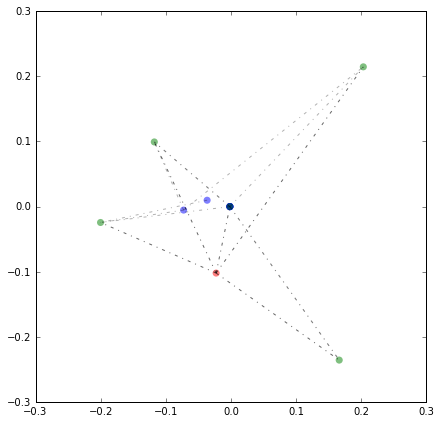

In [873]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3
from networkx.drawing.nx_agraph import graphviz_layout

shownode = tnodep4
show_mat = shownode['mat'][:,:,14]
alpha_mat = show_mat
alpha_mat = np.where(alpha_mat<0, 0, alpha_mat)
# normalize distance matrix
dist_mat = show_mat
dist_mat = np.where((dist_mat<1e-9) & (dist_mat>0), 1e-9, dist_mat)
dist_mat = np.where((dist_mat<=0), 1e-13, dist_mat)
# make diagonal distance matrix
for i in range(dist_mat.shape[0]):
    for j in range(i,dist_mat.shape[1]):
        dist_mat[i,j] = (dist_mat[i,j] + dist_mat[j,i]) / 2
        #dist_mat[i,j] = dist_mat[i,j] if dist_mat[i,j] > dist_mat[j,i] else dist_mat[j,i]
        dist_mat[j,i] = dist_mat[i,j]
#print(dist_mat)        
max_val = np.max(dist_mat)
#print(max_val) 
dist_mat = np.log(max_val/dist_mat)
#dist_mat = np.where(dist_mat<1e-13, 1e-13, dist_mat)
for i in range(dist_mat.shape[0]):
    dist_mat[i,i] = 0
#dist_mat = max_val/np.where(dist_mat<1e-13, 1e-13, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)
#print(dist_mat)


#pos = pCoordinate(dist_mat)
#print(pos)

#G = nx.from_numpy_matrix(dist_mat) 
#pos=nx.spring_layout(G,dim=2,k=0.3)
#pos=graphviz_layout(G,prog='neato')
#print(pos)

# measuring distance matrix using principal coordinate analysis
noise = np.random.normal(0,1e-9,dist_mat.shape[0]*dist_mat.shape[1])
noise=noise.reshape(dist_mat.shape[0],dist_mat.shape[1])
test_dist = dist_mat + noise
pos = pCoordinate(test_dist)

trans = shownode['trans']
target_node = trans.index(shownode['target'])
colors = np.tile('',len(trans))
parents = []
neighbors = []
target = 0
for i in range(len(trans)):
    tran = trans[i]
    if tran == shownode['target']:
        colors[i]='red'
        target = i
    if tran in shownode['parents']:
        colors[i]='green'
        parents.append(i)
    if tran in shownode['neighbors']:
        colors[i]='blue'
        neighbors.append(i)
        
        
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, projection='3d')

# draw the lines from parents to target
for parent in parents:
    linelabel = ax.plot([pos[target][0],pos[parent][0]],[pos[target][1],pos[parent][1]],'-.',c='black',alpha=0.6)
    #print(dist_mat[parent,target])
    #plugins.connect(fig, plugins.LineLabelTooltip(linelabel[0],dist_mat[parent,target],voffset=10, hoffset=10))

# draw the lines from the neighbors to all parent
for neighbor in neighbors:
    act_neighbor = trans[neighbor]
    # get all the parent
    myParents = edges[act_neighbor]
    for myParent in myParents:
        if myParent in trans:
            pIndex = trans.index(myParent)
            linelabel = ax.plot([pos[neighbor][0],pos[pIndex][0]],[pos[neighbor][1],pos[pIndex][1]],'-.',c='black',alpha=0.3)
            #print(dist_mat[pIndex,neighbor])
            #plugins.connect(fig, plugins.LineLabelTooltip(linelabel[0],dist_mat[pIndex,neighbor],voffset=10, hoffset=10))

labels = []
x = []
y = []
c = []
for k, p in pos.items():
    #x.append(p[0])
    #y.append(p[1])
    #c.append(colors[k])
    #labels.append(nodeHash[trans[k]])
    scatter = ax.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    tooltip = plugins.PointHTMLTooltip(scatter, ['{}, alpha to {}: {}'.format(nodeHash[trans[k]],nodeHash[trans[target_node]],alpha_mat[k,target_node])],
                                       voffset=10,hoffset=10)
    plugins.connect(fig, tooltip)

        
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')

#scatter = ax.scatter(x,y, marker='o', c=c, s=50,alpha=0.5, edgecolor='None')

    
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()
#print(labels)
#tooltip = plugins.PointHTMLTooltip(scatter, labels,
#                                   voffset=10, hoffset=10)
#plugins.connect(fig, tooltip)

#mpld3.display()
mpld3.enable_notebook()


In [821]:
alpha_mat[10,]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [771]:
def pCoordinate(s2):
    # Principal Coordinate analysis,
    # Embedd distance in the 2,3 dimension coordinates
    # Form A matrix
    # test my distance using square and triangle, looks right
    #s2 = [[0,10,14.14,10],[10,0,10,14.14],[14.14,10,0,10],[10,14.14,10,0]]
    #s2 = [[0,10,14.15],[10,0,10],[14.15,10,0]]
    Am = np.identity(s2.shape[0]) - (1/s2.shape[0])*(np.ones(s2.shape[0])*np.ones(s2.shape[0]).T)
    #logger.debug(Am)
    #logger.debug(0.5 * Am * d2 * Am.T)
    # Form W
    Wm = -0.5 * Am * s2 * Am.T
    #logger.debug(Wm)
    # calculate eigen vectors and eigen values of Wm
    evals, evecs = np.linalg.eig(Wm)
    #logger.debug('evals: {}\ndim: {}'.format(evals,evals.shape))
    #logger.debug('evecs: {}\ndim: {}'.format(evecs,evecs.shape))
    # sort by eigenvalue
    indices = np.argsort(evals)
    # turn back the order
    indices = indices[::-1]
    evecs = evecs[:,indices]
    evals = evals[indices]
    Vt = np.sqrt(np.diag(evals[:2])).dot(evecs[:,:2].T)
    result = {}
    #print(Vt)
    for i in range(len(Vt[0,])):
        result[i] = [Vt[0,i],Vt[1,i]]
    return result

In [780]:
dist_mat
noise = np.random.normal(0,1e-6,dist_mat.shape[0]*dist_mat.shape[1])
noise=noise.reshape(dist_mat.shape[0],dist_mat.shape[1])
test_dist = dist_mat + noise
pcoor = pCoordinate(test_dist)
pcoor

{0: [-0.011437802897090673, 0.00048702233117380001],
 1: [-0.024880928492104732, 0.0004149606535540411],
 2: [-0.004766219622588665, 0.037827133869579782],
 3: [-0.0016471662921177903, 0.016645863346614009],
 4: [-0.0039450462571983405, 0.003355829316756727],
 5: [-0.0055590471688556006, -0.05105168671557879],
 6: [-0.0022942845136364868, -0.059352913027396266],
 7: [-0.0061990804305624364, -0.04452638718662464],
 8: [0.071661946407553634, -0.0043942513476221768],
 9: [-0.024880259151617255, 0.00041493573340168797],
 10: [-0.0079910939831161192, 0.0052102836204938998],
 11: [-0.0091379241294539688, -0.0019013492858305932],
 12: [-0.024880480907436001, 0.00041494510469349753],
 13: [-0.01330479855073524, 0.0064701934730895675],
 14: [-4.1974438476439105e-05, -0.025608971762902562],
 15: [-0.024880761404492625, 0.0004149564183874728],
 16: [-0.024880064478848163, 0.00041492884313203539],
 17: [-0.0058277667632638339, 0.0034908726763638498],
 18: [-0.024880894894961862, 0.0004149626963720

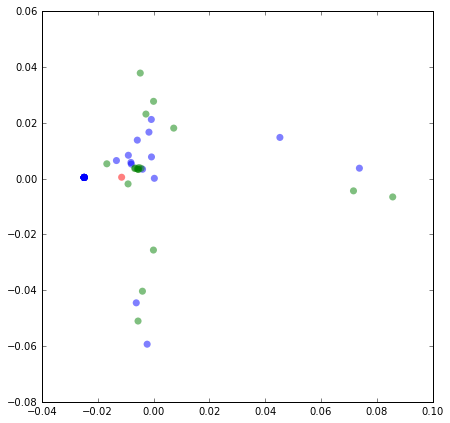

In [781]:
fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, projection='3d')
for k, p in pcoor.items():
    plt.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')